# Clusterização da Grande Base

## Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings('ignore') #ou warnings.filterwarnings(action='once')

In [2]:
uri = 'https://raw.githubusercontent.com/ieee-uerj/capes-data-analysis/main/data/Grande%20Base.csv'
df = pd.read_csv(uri, encoding='latin-1')

## Análises Gerais

In [3]:
df.head()

,CD_PROGRAMA_IES,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,NM_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,SG_ENTIDADE_ENSINO,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,CS_STATUS_JURIDICO,AN_NASCIMENTO_DISCENTE,NM_REGIAO,SG_UF_PROGRAMA,CD_CONCEITO_PROGRAMA,Unnamed: 0,NM_MODALIDADE_PROGRAMA,UF_Qtd_Proj,UF_Pesquisas,UF_Outros projetos,UF_Qtd_Financiamentos,BOLSA,OUTRO AUXÃLIO FINANCEIRO,SEM AUXÃLIO
0,12001015018P0,2013,45,3,32,18,14,30,2,1,31,0,32,0,27,5,0,31,1,0,0,1,3.0,2.0,DISSERTAÇÃO,0.0,99.700000,0,30,14,18,30,2,32,1965.562500,UFAM,15,55,70,0,11.623214,2.187500,70,0.214286,3.381643,20.700000,3.115625,FEDERAL,1977.185714,NORTE,AM,3,0,ACADÃMICO,9,8,1,19,13,5,1
1,12001015018P0,2013,45,3,32,18,14,30,2,1,31,0,32,0,27,5,0,31,1,0,0,1,3.0,2.0,DISSERTAÇÃO,0.0,99.700000,0,30,14,18,30,2,32,1965.562500,UFAM,15,55,70,0,11.623214,2.187500,70,0.214286,3.381643,20.700000,3.115625,FEDERAL,1977.185714,NORTE,AM,3,75,ACADÃMICO,9,8,1,19,13,5,1
2,12001015018P0,2013,45,3,32,18,14,30,2,1,31,0,32,0,27,5,0,31,1,0,0,1,3.0,2.0,DISSERTAÇÃO,0.0,99.700000,0,30,14,18,30,2,32,1965.562500,UFAM,15,55,70,0,11.623214,2.187500,70,0.214286,3.381643,20.700000,3.115625,FEDERAL,1977.185714,NORTE,AM,3,155,ACADÃMICO,9,8,1,19,13,5,1
3,12001015018P0,2013,45,3,32,18,14,30,2,1,31,0,32,0,27,5,0,31,1,0,0,1,3.0,2.0,DISSERTAÇÃO,0.0,86.666667,0,7,13,16,27,2,29,1966.793103,UFAM,12,44,56,0,12.599754,1.931034,56,0.214286,2.041667,27.428571,2.988506,FEDERAL,1979.392857,NORTE,AM,3,0,ACADÃMICO,9,8,1,19,13,5,1
4,12001015018P0,2013,45,3,32,18,14,30,2,1,31,0,32,0,27,5,0,31,1,0,0,1,3.0,2.0,DISSERTAÇÃO,0.0,86.666667,0,7,13,16,27,2,29,1966.793103,UFAM,12,44,56,0,12.599754,1.931034,56,0.214286,2.041667,27.428571,2.988506,FEDERAL,1979.392857,NORTE,AM,3,75,ACADÃMICO,9,8,1,19,13,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CD_PROGRAMA_IES              16800 non-null  object 
 1   AN_BASE                      16800 non-null  int64  
 2   CD_AREA_AVALIACAO            16800 non-null  int64  
 3   CONCEITO_PROGRAMA            16800 non-null  int64  
 4   IB_Total_docentes            16800 non-null  int64  
 5   IB_Mulheres                  16800 non-null  int64  
 6   IB_Homens                    16800 non-null  int64  
 7   IB_Brasileiros               16800 non-null  int64  
 8   IB_Estrangeiros              16800 non-null  int64  
 9   IB_QTDE_Regime_Parcial       16800 non-null  int64  
 10  IB_QTDE_Regime_Integral      16800 non-null  int64  
 11  IB_QTDE_Regime_Exclusivo     16800 non-null  int64  
 12  IB_QTDE_Prof_Doutor          16800 non-null  int64  
 13  IB_QTDE_Prof_Nao

## Analisando a variável alvo

In [5]:
df[df['CONCEITO_PROGRAMA'] != 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,UF_Qtd_Proj,UF_Pesquisas,UF_Outros projetos,UF_Qtd_Financiamentos,BOLSA,OUTRO AUXÃLIO FINANCEIRO,SEM AUXÃLIO
count,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,15373.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,15373.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.000000,16037.00000,16037.000000,16037.000000,16037.000000,16037.000000
mean,2015.985658,24.030804,4.002993,21.217622,7.979921,13.237700,20.719711,0.497911,1.194550,16.023695,3.999376,21.052067,0.165555,18.406872,2.810750,1.004427,17.354430,2.606036,0.157448,0.095280,1.579285,4.009104,2.253850,0.843238,120.192716,0.365093,19.401571,13.283345,8.012970,20.793478,0.502837,21.296315,1967.961550,41.398267,42.650371,82.565068,1.483569,16.346200,4.067180,84.048638,0.490226,2.762187,29.995588,6.393419,1984.307750,4.017460,180.307788,67.747708,61.052379,6.69533,56.283968,22.243437,31.537258,2.503274
std,1.994484,14.980420,0.938488,9.095741,6.254505,5.926095,8.807258,0.852387,1.597208,9.415584,7.044995,9.105208,0.590387,7.843427,2.894682,1.357349,10.952611,4.948430,0.610738,0.385928,0.493689,0.935487,3.172079,0.363588,45.152870,1.507141,11.505944,5.908129,6.260553,8.778020,0.855525,9.068515,5.010035,32.038697,29.502822,49.778777,4.174279,4.220011,1.973006,51.204796,0.192452,1.490093,6.606516,3.427970,4.195780,0.937798,104.949227,40.488982,38.903043,5.49728,42.823699,25.470381,25.794353,3.824432
min,2013.000000,2.000000,1.000000,9.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,34.454545,0.000000,1.000000,0.000000,0.000000,9.000000,0.000000,9.000000,1951.833333,4.000000,2.000000,22.000000,0.000000,-2.276258,1.037037,22.000000,0.045455,0.509434,14.454545,1.003432,1968.106061,2.000000,0.000000,9.000000,8.000000,1.00000,4.000000,1.000000,1.000000,1.000000
25%,2014.000000,11.000000,3.000000,16.000000,5.000000,9.000000,16.000000,0.000000,0.000000,12.000000,0.000000,16.000000,0.000000,13.000000,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,85.714286,0.000000,12.000000,9.000000,5.000000,16.000000,0.000000,16.000000,1964.666667,20.000000,25.000000,50.000000,0.000000,13.899830,2.714286,50.000000,0.365854,1.911197,24.666667,3.808824,1981.622222,3.000000,88.000000,37.000000,31.000000,3.00000,27.000000,6.000000,14.000000,1.000000
50%,2016.000000,23.000000,4.000000,20.000000,8.000000,13.000000,19.000000,0.000000,1.000000,15.000000,1.000000,19.000000,0.000000,18.000000,2.000000,1.000000,18.000000,0.000000,0.000000,0.000000,2.000000,4.0

In [6]:
df[df['CONCEITO_PROGRAMA'] == 7].describe()

,AN_BASE,CD_AREA_AVALIACAO,CONCEITO_PROGRAMA,IB_Total_docentes,IB_Mulheres,IB_Homens,IB_Brasileiros,IB_Estrangeiros,IB_QTDE_Regime_Parcial,IB_QTDE_Regime_Integral,IB_QTDE_Regime_Exclusivo,IB_QTDE_Prof_Doutor,IB_QTDE_Prof_NaoDoutor,IB_QTDE_titulados_Brasil,IB_QTDE_titulados_Exterior,IB_Profs_Colaboradores,IB_Profs_ServidoresPublicos,IB_Profs_VinculoCLT,IB_Profs_Aposentados,IB_Profs_BolsaDeFixacao,IB_Total_cursos,MEDIA_CONCEITO_CURSO,ID_SUBTIPO_PRODUCAO,IN_TRABALHO_MESMA_AREA,NR_PAGINAS,GUS_Lingua_estrangeira,GUS_Quantidade_Trabalhos,GUS_Do_Homens,GUS_Do_Mulheres,GUS_Do_Brasileiros,GUS_Do_Estrangeiros,GUS_Quantidade_Docentes,AN_NASCIMENTO_DOCENTE,GUS_Dis_Homens,GUS_Dis_Mulheres,GUS_Dis_Brasileiros,GUS_Dis_Estrangeiros,GUS_diferenca_idade,GUS_razao_aluno_prof,GUS_Quantidade_Discentes,GUS_Dis_Prop_Homens,GUS_Dis_Aluno_Tempo,QT_MES_TITULACAO,GUS_pag_por_aluno,AN_NASCIMENTO_DISCENTE,CD_CONCEITO_PROGRAMA,Unnamed: 0,UF_Qtd_Proj,UF_Pesquisas,UF_Outros projetos,UF_Qtd_Financiamentos,BOLSA,OUTRO AUXÃLIO FINANCEIRO,SEM AUXÃLIO
count,763.000000,763.000000,763.0,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.0,763.0,763.0,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,2016.330275,22.247706,7.0,22.853211,8.357798,14.495413,22.165138,0.688073,1.284404,12.541284,9.027523,22.798165,0.055046,18.165138,4.688073,0.871560,20.935780,0.660550,0.275229,0.110092,2.0,7.0,2.0,0.788991,137.462473,2.926606,23.549148,14.330275,8.397117,22.039318,0.688073,22.727392,1963.493246,54.390564,56.187418,101.441678,9.136304,23.444352,4.997473,110.577982,0.491381,2.913772,38.005838,6.122080,1986.937599,6.905636,175.174312,112.211009,108.660550,3.550459,126.458716,42.899083,81.981651,1.577982
std,2.001565,15.913900,0.0,3.785169,3.925039,3.523214,4.006097,1.029589,1.746870,9.564908,8.168214,3.768031,0.228219,5.306262,2.225998,1.033185,2.429546,1.370424,0.446923,0.313209,0.0,0.0,0.0,0.408293,51.339075,4.951456,7.482693,3.302105,3.932280,3.789199,1.029589,3.579120,3.890739,18.124446,18.448702,28.907631,6.921175,3.204501,1.570058,29.728255,0.112109,0.687785,4.062202,2.219587,1.890490,0.292527,100.477847,49.575005,49.422294,1.129889,59.055508,37.492103,46.113914,0.610613
min,2013.000000,5.000000,7.0,17.000000,2.000000,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,11.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,2.0,7.0,2.0,0.000000,86.031250,0.000000,13.000000,9.000000,2.000000,16.000000,0.000000,17.000000,1955.818182,24.000000,26.000000,57.000000,0.000000,17.970308,2.566667,70.000000,0.277778,1.659091,32.000000,3.740489,1982.843284,6.000000,28.000000,25.000000,21.000000,1.000000,62.000000,10.000000,12.000000,1.000000
25%,2015.000000,5.000000,7.0,20.000000,4.000000,12.000000,19.000000,0.000000,0.000000,1.000000,2.000000,20.000000,0.000000,13.000000,3.000000,0.000000,19.000000,0.000000,0.000000,0.000000,2.0,7.0,2.0,1.000000,107.789474,0.000000,18.000000,12.000000,4.000000,19.000000,0.000000,20.000000,1962.157895,35.000000,40.000000,86.000000,3.000000,20.890244,3.476190,89.000000,0.402299,2.389610,34.440000,4.733333,1985.261682,7.000000,104.000000,104.000000,99.000000,3.000000,67.000000,11.000000,50.000000,1.000000
50%,2017.000000,19.000000,7.0,22.000000,8.000000,14.000000,21.000000,0.000000,1.000000,18.000000,4.000000,22.000000,0.000000,17.000000,6.000000,1.000000,21.000000,0.000000,0.000000,0.000000,2.0,7.0,2.0,1.000000,118.111111,1.000000,19.000000,14.000000,8.000000,21.000000,0.000000,22.000000,1963.368421,61.000000,54.000000,99.000000,9.000000,23.352874,5.100000,104.000000,0.495935,2.992212

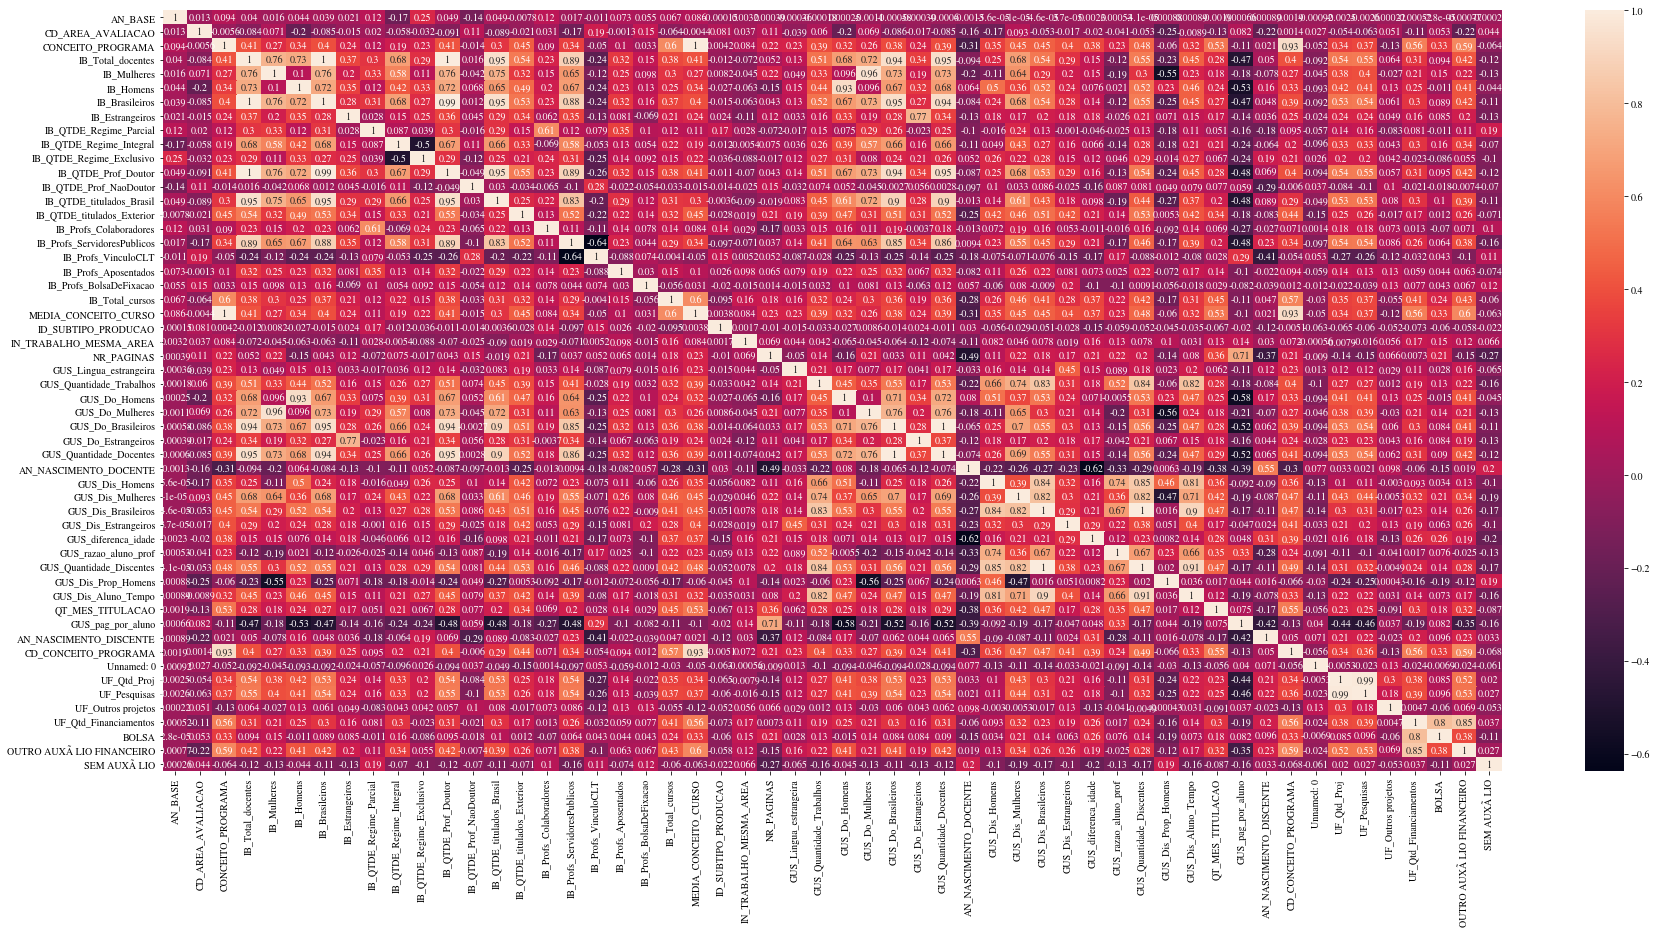

In [16]:
plt.figure(figsize = (30,14))
ax = sns.heatmap(df.corr(), annot = True)
ax = ax

In [20]:
conceito_corr = df.corr()['CONCEITO_PROGRAMA'].to_frame().reset_index()
conceito_corr = conceito_corr[conceito_corr['CONCEITO_PROGRAMA'] < 0.9].sort_values(by = 'CONCEITO_PROGRAMA', ascending = False)

Text(0.0, 1.0, 'Correlações com o Conceito')

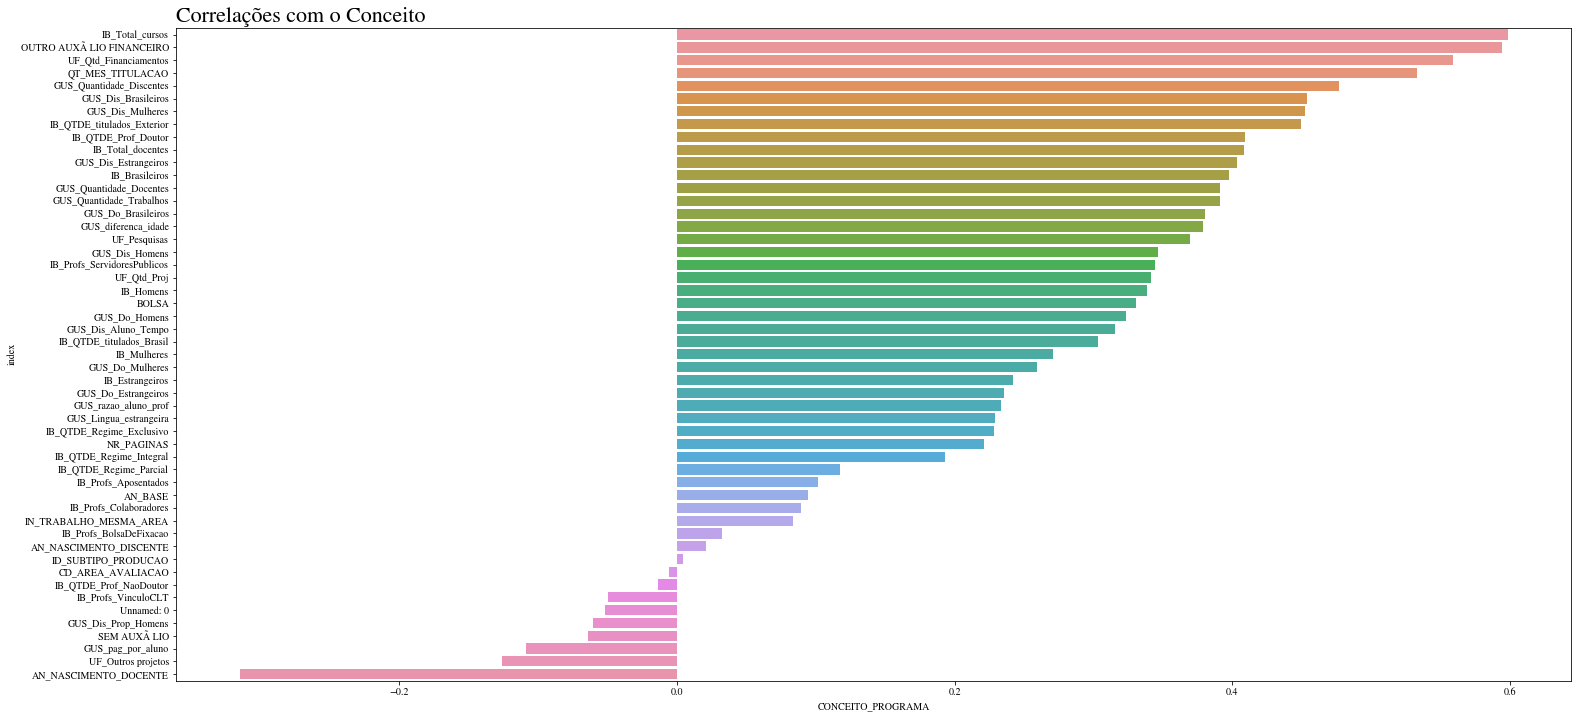

In [21]:
plt.figure(figsize = (25,12))
sns.barplot(data = conceito_corr, y = 'index', x = 'CONCEITO_PROGRAMA')
plt.title("Correlações com o Conceito", fontsize = 22, loc = 'left')